# 1. 数据读取

In [1]:
import warnings
warnings.filterwarnings("ignore")  # 忽略警告信息

import matplotlib.pyplot as plt  # 导入matplotlib.pyplot模块，用于数据可视化

# 设置中文编码和负号的正常显示
plt.rcParams['font.family'] = 'Microsoft YaHei'  # 设置字体为微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

import pandas as pd  # 导入pandas库，用于数据处理和分析
import numpy as np  # 导入numpy库，用于科学计算

这段代码主要完成以下操作：

1. 导入`warnings`模块，用于控制警告信息的显示与忽略。
2. 调用`filterwarnings`函数，设置忽略警告信息，避免警告信息的输出。
3. 导入`matplotlib.pyplot`模块，用于绘制数据可视化图形。
4. 设置中文编码和负号的正常显示。通过`plt.rcParams`字典来配置`matplotlib`的全局参数。
   - `'font.family'`用于设置字体族，这里将其设置为"Microsoft YaHei"，即微软雅黑字体。
   - `'axes.unicode_minus'`用于解决负号显示问题，将其设置为`False`，表示显示正常的负号。
5. 导入`pandas`库，用于数据处理和分析。
6. 导入`numpy`库，用于进行科学计算。

In [2]:
data_train = pd.read_csv("./datasets/train.csv")
data_test = pd.read_csv("./datasets/test.csv")
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
print("训练数据的形状（行数，列数）:\n", data_train.shape)  # 输出训练数据的形状（行数，列数）

print("\n测试数据的形状(行数，列数）:\n", data_test.shape)  # 输出测试数据的形状（行数，列数）

print("\n训练数据的列名:\n", data_train.columns)  # 输出训练数据的列名

训练数据的形状（行数，列数）:
 (891, 12)

测试数据的形状(行数，列数）:
 (418, 11)

训练数据的列名:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


可以看到训练集总共有12列891行数据，其中Survived字段表示的是乘客是否获救，其余都是乘客个人信息，包括：
- PassengerId --- 乘客ID
- Survived --- 获救情况（二分类，因变量）
- Pclass --- 乘客等级(1/2/3等舱位)
- Name --- 乘客姓名
- Sex --- 性别
- Age --- 年龄
- SibSp --- 堂兄弟/妹个数
- Parch --- 父母与小孩个数
- Ticket --- 船票信息
- Fare --- 票价
- Cabin --- 客舱
- Embarked --- 登船港口

## 1.2 简单描述性分析

In [4]:
# data_train.info() 
print("----------------------------\n训练集")
print(data_train.isnull().sum()) # 看一下数据类型及缺失情况
print("----------------------------\n测试集")
print(data_test.isnull().sum())

----------------------------
训练集
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------
测试集
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


数据显示，

训练数据集中12列特征，其中有三列数据存在缺失：
- Age(年龄)：有177条记录缺失；
- Cabin(客舱)：有687条记录缺失，缺失较多！；
- Embarked(登船港口)：只有两条记录缺失；

训练数据集中12列特征，其中有两列数据存在缺失：
- Age(年龄)：有86条记录缺失；
- Cabin(客舱)：有327条记录缺失，缺失较多！；

In [5]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


根据表格，我们可以得出一些基本信息：
- Survived：大概有0.383838比例的人最后获救了；
- Pclass: 2号和3号舱的人要比1号舱的人多；
- Age：所有乘客的平均年龄大概再29.7岁，最小的乘客0.42岁，最大的乘客80岁；
- Fare：平均票价在32元，最高的票价在512元；
- ....

In [6]:
data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


训练集和测试集大致的分布相差不大；

## 1.3 探索性分析
### 1.3.1 乘客不同特征的描述性统计

Text(0, 0.5, '人数')

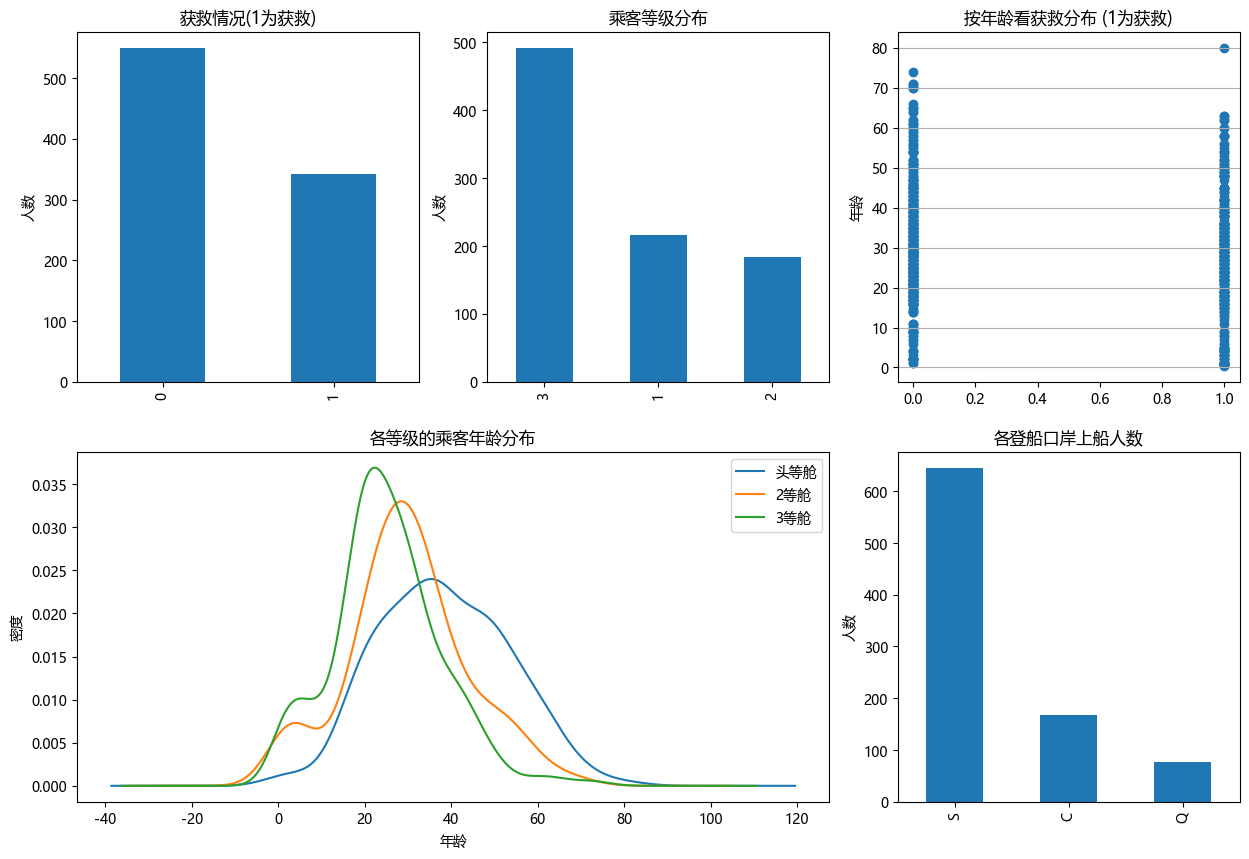

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15,10))
fig.set(alpha=0.2) # 设定图标透明度

plt.subplot2grid((2,3),(0,0)) # 分为2行3列，从(0,0)算起
data_train.Survived.value_counts().plot(kind='bar')
plt.title('获救情况(1为获救)')
plt.ylabel('人数')

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel("人数")
plt.title("乘客等级分布")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel("年龄")                         
plt.grid(True, which='major', axis='y') # 绘制网格线
plt.title("按年龄看获救分布 (1为获救)")

plt.subplot2grid((2,3),(1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')  # 绘制密度图
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel("年龄")
plt.ylabel("密度") 
plt.title("各等级的乘客年龄分布")
plt.legend(('头等舱', '2等舱', '3等舱'),loc='best')

plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title("各登船口岸上船人数")
plt.ylabel("人数")

- 根据训练集数据绘制如上图所示，从图中我们可以得到一些信息：
    - 未能获救的人有500+，而获救的人大概有300+，不到人数的一半；
    - 三等舱乘客最多，接近500人，而一等和二等舱的乘客相对较少，都在200人左右；
    - 从年龄分布可以看出，遇难和获救的乘客年龄分布都比较离散，跨度大；
    - 三个不同舱的乘客年龄总体趋势大致相同，其中20岁左右的乘客主要集中再二三等舱，一等舱中40岁左右的最多；
    - 再登船港口中，其中S港口上传人数最多，有600+人，另外两个C和Q港口，都不到200人，要远远小于C港口；
- 根据以上结论，提出一些假设：
    - 不同舱位/乘客等级可能和财富/地位有关系，最后获救概率可能会不一样；
    - 年龄对获救概率也一定是有影响的，毕竟背景知识提到，副船长还说『小孩和女士先走』呢；
    - 获救概率与登船港口是不是有关系呢？也许登船港口不同，人的出身地位不同？
    - ...
    
### 1.3.2 看看各乘客等级的获救情况

<Figure size 640x480 with 0 Axes>

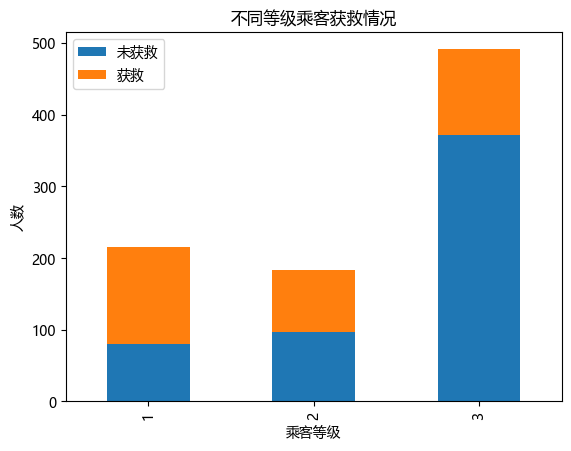

In [8]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df = pd.DataFrame({u'未获救':Survived_0, u'获救':Survived_1})
df.plot(kind='bar', stacked=True)
plt.title(u'不同等级乘客获救情况')
plt.xlabel(u'乘客等级')
plt.ylabel(u'人数')
plt.show()

In [9]:
data_train[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


从图中可以看出，等级为1的乘客，获救的概率最大，并且随着等级的递减，获救的概率也是递减状态！所以，乘客等级这必然是一个影响乘获救的重要特征！！

### 1.3.3 查看各性别的获救情况

<Figure size 640x480 with 0 Axes>

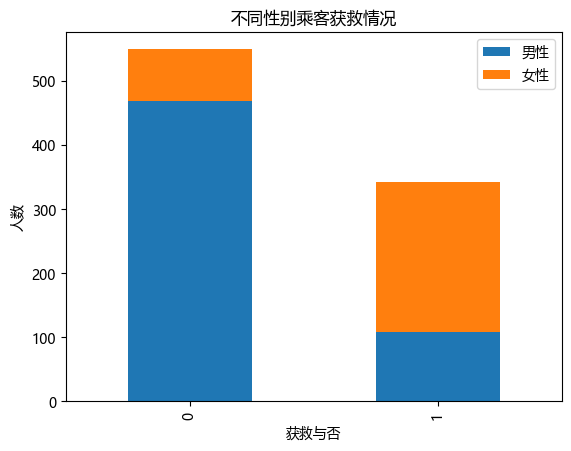

In [10]:
fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_1 = data_train.Survived[data_train.Sex == 'female'].value_counts()
df = pd.DataFrame({u'男性':Survived_0, u'女性':Survived_1})
df.plot(kind='bar', stacked=True)
plt.title(u'不同性别乘客获救情况')
plt.xlabel(u'获救与否')
plt.ylabel(u'人数')
plt.show()

In [11]:
data_train[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


从图中可以看出，相对男性来说，女性的获救率远远高于男性，看来外国人还是比较践行女性优先的！所以，性别对于最终生存与否也是有非常重要影响的！

### 1.3.4 查看各登船港口的获救情况
泰坦尼克号从英国的南安普顿港出发，途径法国瑟堡和爱尔兰昆士敦，那么在昆士敦之前上船的人，有可能在瑟堡或昆士敦下船，这些人将不会遇到海难。

<Figure size 1000x1500 with 0 Axes>

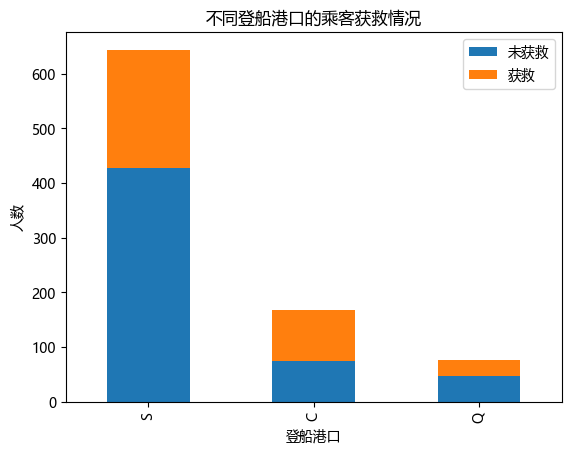

In [12]:
fig = plt.figure(figsize=(10,15))
fig.set(alpha=0.2)

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df = pd.DataFrame({u'未获救':Survived_0, u'获救':Survived_1})
df.plot(kind='bar', stacked=True)
plt.title(u'不同登船港口的乘客获救情况')
plt.xlabel(u'登船港口')
plt.ylabel(u'人数')
plt.show()

In [13]:
data_train[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


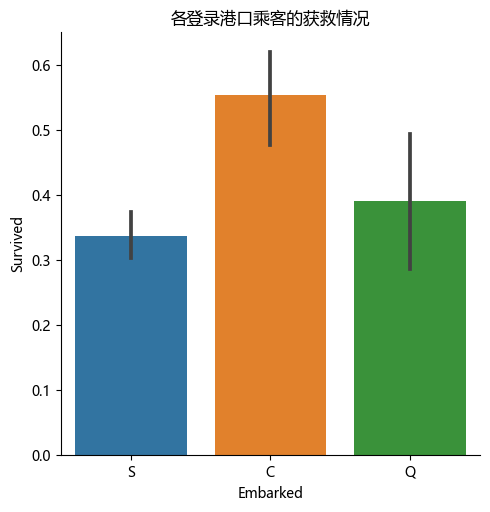

In [14]:
import seaborn as sns

# 使用seaborn库绘制分类条形图，展示各登录港口乘客的获救情况
sns.catplot(x='Embarked', y='Survived', data=data_train, kind='bar')

# 图表标题
plt.title('各登录港口乘客的获救情况')

# 显示图表
plt.show()

可以看出，再不同港口上船，生还率不同，其中C港口最高，Q次之，S港口最低；

### 1.3.5 查看携带家人数量不同的获救情况

In [15]:
# 给家庭人数特征列赋值，将SibSp（亲属兄弟姐妹数量）和Parch（亲属父母子女数量）相加
data_train['family'] = data_train['SibSp'] + data_train['Parch']

# 输出家庭人数特征列
data_train['family']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: family, Length: 891, dtype: int64

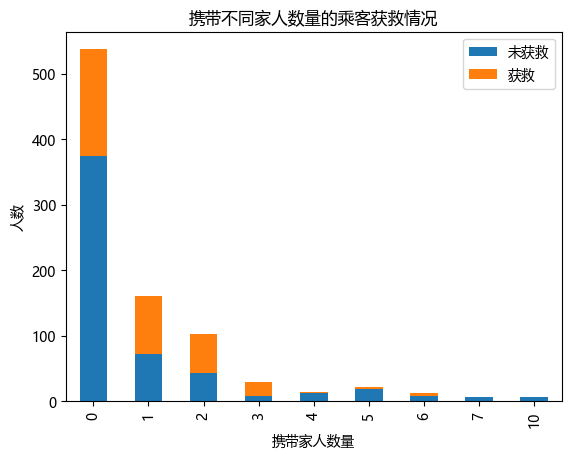

In [16]:
# 对于未获救的乘客，统计家庭人数特征列的各个取值出现次数
Survived_0 = data_train.family[data_train.Survived == 0].value_counts()

# 对于获救的乘客，统计家庭人数特征列的各个取值出现次数
Survived_1 = data_train.family[data_train.Survived == 1].value_counts()

# 创建一个DataFrame来保存携带不同家人数量的乘客获救情况
df = pd.DataFrame({u'未获救':Survived_0, u'获救':Survived_1})

# 绘制堆积条形图
df.plot(kind='bar', stacked=True)

# 图表标题
plt.title(u'携带不同家人数量的乘客获救情况')

# x轴标签
plt.xlabel(u'携带家人数量')

# y轴标签
plt.ylabel(u'人数')

# 显示图表
plt.show()

<Axes: xlabel='family'>

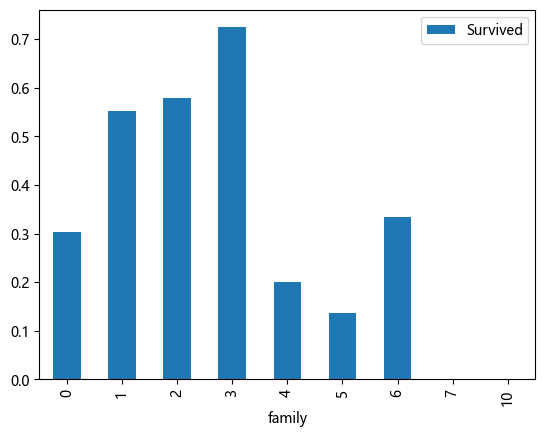

In [17]:
# 对家庭人数特征列和获救情况特征列进行分组，统计各家庭人数的获救率，并绘制条形图
data_train[['family', 'Survived']].groupby('family').mean().plot.bar()

可以看到，独自一人和亲友太多，存活率都比较低；

### 1.3.6 不同船舱类型的乘客获救情况

船舱的缺失值确实太多，有效值仅仅有204个，很难分析出不同的船舱和存活的关系，我们可以直接将该组特征丢弃掉，也可以简单地将数据分为是否有Cabin记录作为特征，将缺失数据归为一类，未缺失数据归为一类，一同跟与Survived进行分析；

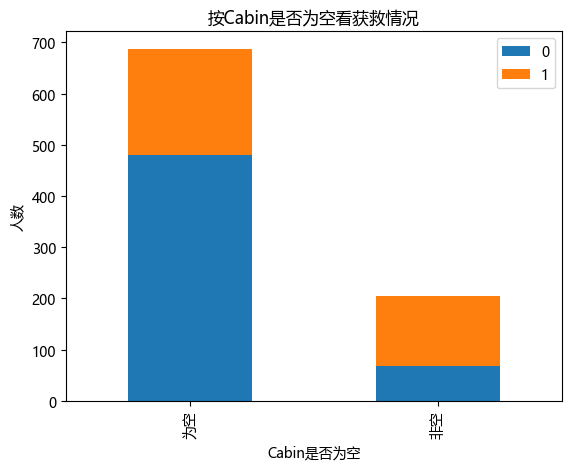

In [18]:
# 统计Cabin是否为空的乘客中获救和未获救人数
is_null = data_train.Survived[data_train.Cabin.isnull()].value_counts()

# 统计Cabin非空的乘客中获救和未获救人数
not_null = data_train.Survived[data_train.Cabin.notnull()].value_counts()

# 创建一个DataFrame来保存Cabin是否为空的乘客中的获救情况
df = pd.DataFrame({'为空':is_null, '非空':not_null}).transpose()

# 绘制堆积条形图
df.plot(kind='bar', stacked=True)

# 图表标题
plt.title('按Cabin是否为空看获救情况')

# x轴标签
plt.xlabel('Cabin是否为空')

# y轴标签
plt.ylabel('人数')

# 显示图表
plt.show()

In [19]:
# 统计Cabin非空的乘客中获救和未获救人数，并计算获救人数占总人数的比例
data_train.Survived[data_train.Cabin.notnull()].value_counts(normalize=True)

1    0.666667
0    0.333333
Name: Survived, dtype: float64

可以看出，有cabin记录的乘客survival比例比无记录的高很多；

### 1.3.7 缺失值处理

- 这里只是为了进行探索性分析，具体更详细的数据处理见特征工程部分；
- 通常遇到缺值的情况，有下面几种处理方式:
    - 如果缺值的样本占比较高，可以直接舍弃，以免作为特征加入，反倒带入噪声；
    - 如果缺值的样本适中，而该属性非连续值特征属性(比如类目属性)，那就把NaN作为一个新类别，加到类别特征中
    - 如果缺值的样本适中，而该属性为连续值特征属性，可以尝试分桶处理；
    - 当缺失的样本并不是特别多的时候，我们可以试着根据已有的值，拟合一下数据，补充上。
- Embarked（共有三个上船地点），缺失俩值，可以用众数填充；
- Cabin将缺失信息当做一个类目；

#### 处理Embarked和数据
由于总共有1309条数据，Embarked只缺失两个，所以用众数填充即可

In [20]:
# 如果Embarked缺失，则用出现次数最多的值进行填充
data_train.Embarked[data_train.Embarked.isnull() == True] = data_train.Embarked.dropna().mode().values

# 对于Cabin缺失的数据，用U0进行填充
data_train['Cabin'] = data_train.Cabin.fillna('U0')

#### 处理Age数据

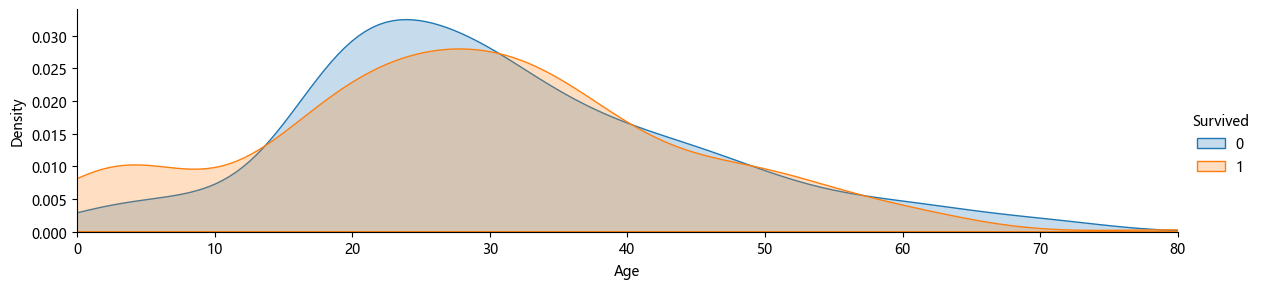

In [21]:
# 任务：绘制数据集data_train中Survived列与Age列的关系图，并按照Survived列进行分组，展示各组的核密度估计图。

# 使用seaborn库的FacetGrid方法创建画布facet，hue参数指定按Survived分组，aspect参数指定画布宽高比为4:1
facet = sns.FacetGrid(data_train,hue="Survived",aspect=4)

# 在facet上绘制核密度估计图，x轴为Age列，shade参数指定是否填充颜色
facet.map(sns.kdeplot,'Age',shade=True)

# 设置x轴范围为0到Age列的最大值
facet.set(xlim=(0,data_train['Age'].max()))

# 添加图例
facet.add_legend() 

- 通常使用回归、随机森林等模型来预测缺失属性的值。
- 经过分析：Age在该数据集里是一个相当重要的特征，所以保证一定的缺失值填充准确率是非常重要的，对结果也会产生较大影响。
- 这里使用随机森林预测模型，选取数据集中的数值属性作为特征（因为sklearn的模型只能处理数值属性，所以这里先仅选取数值特征，但在实际的应用中需要将非数值特征转换为数值特征）；

In [22]:
# 任务：查看数据集data_train的基本信息，包括列名、非空值数量、数据类型等。

# 输出data_train的基本信息，包括列名、非空值数量、数据类型等
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  family       891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [23]:
# 任务：使用随机森林回归模型填充数据集data_train中的缺失值，然后输出数据集的基本信息

# 导入随机森林回归模型
from sklearn.ensemble import RandomForestRegressor

# 选取需要用到的列
cols = ['Age', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Fare']

# 选出数据集中Age列非空的数据
age_df = data_train[cols]
X_train = age_df[age_df.Age.notnull()][cols[1:]]
y_train = age_df[age_df.Age.notnull()][cols[0]]

# 选出数据集中Age列为空的数据
X_test = age_df[age_df.Age.isnull()][cols[1:]]

# 构建随机森林回归模型
rfr = RandomForestRegressor(n_estimators=1000, n_jobs=-1) #n_estimators控制随机森林决策树的数量；n_jobs=-1会使用CPU的全部内核，大幅度提升速度
rfr.fit(X_train, y_train)

# 预测Age列的缺失值
y_predict = rfr.predict(X_test)

# 将预测的缺失值填充到原数据集中
data_train.loc[data_train.Age.isnull(),'Age'] = y_predict

# 输出填充后的数据集的基本信息
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  family       891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


### 1.3.8 不同年龄下的平均生存率

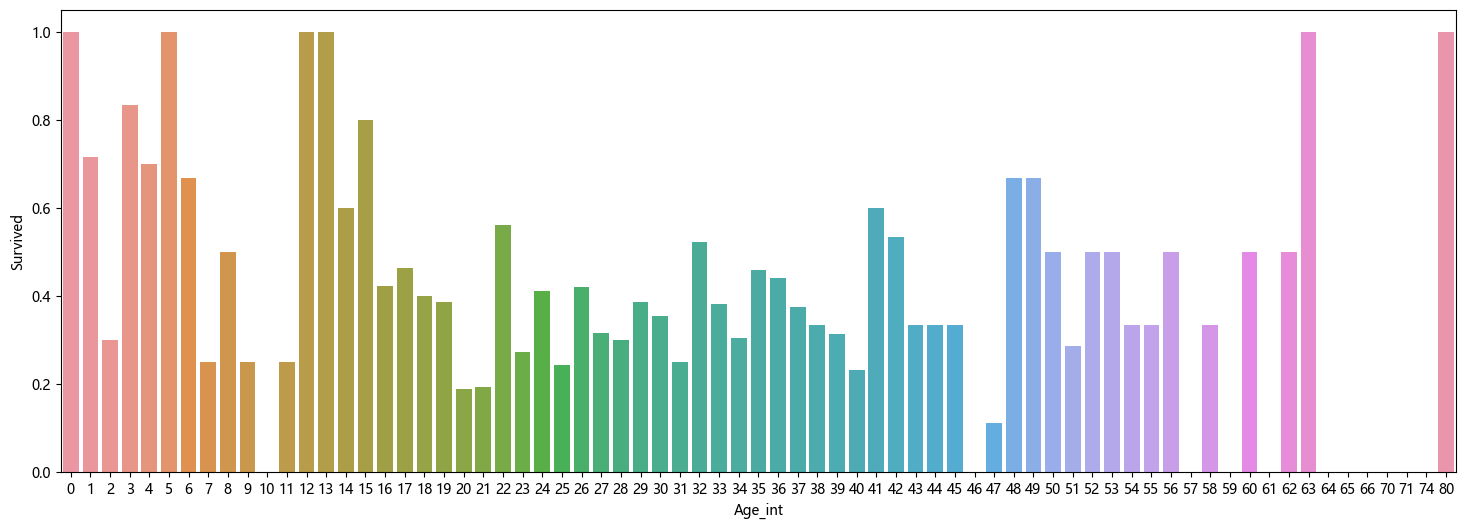

In [24]:
# 任务：绘制乘客年龄与生还率的柱状图

# 导入绘图相关的库
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图的大小
plt.figure(figsize=(18,6))

# 将Age列转换为整型数据并加入到原数据集中
data_train['Age_int'] = data_train.Age.astype(int)

# 对Age_int和Survived两列进行分组并计算生还率
rate = data_train[['Age_int', 'Survived']].groupby('Age_int', as_index=False).mean()

# 绘制柱状图
sns.barplot(x='Age_int', y='Survived', data=rate)

# 显示图形
plt.show()

In [25]:
# 任务：查看数据集data_train中年龄列的描述性统计信息

# 输出数据集中年龄列的描述性统计信息
data_train['Age'].describe()

count    891.000000
mean      29.667574
std       13.743877
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

从上图可以看出，训练样本共有891份，平均年龄在29.5岁，标准差为13.7岁，最小年龄0.42岁，最大年龄80岁；根据年龄，可以将乘客划分为儿童、少年、成年、老年，分析四个群体的生还情况；

In [26]:
# 任务：将年龄列按照一定的区间划分为不同的组，并计算每组的生还率

# 导入pandas库
import pandas as pd

# 划分年龄区间
bins = [0, 12, 18, 65, 100]
data_train['Age_group'] = pd.cut(data_train['Age'], bins)

# 按照年龄区间分组并计算生还率
age_group_survived_rate = data_train.groupby('Age_group')['Survived'].mean()

# 输出每个年龄组的生还率
age_group_survived_rate

Age_group
(0, 12]      0.506173
(12, 18]     0.466667
(18, 65]     0.364512
(65, 100]    0.125000
Name: Survived, dtype: float64

<Axes: xlabel='Age_group'>

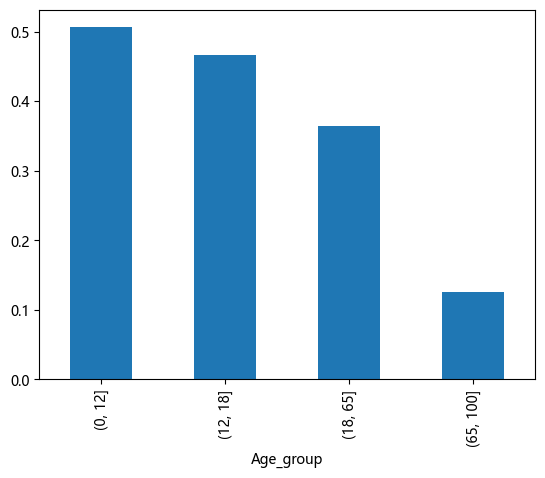

In [27]:
# 任务：将每个年龄组的生还率以条形图形式展示出来

# 将每个年龄组的生还率以条形图形式展示出来
age_group_survived_rate.plot(kind='bar')

从图中可以看出，0到12岁儿童的存活率是最高的，达到了50%左右，其次是少年群体，在45%以上，最低的就属于65岁到100岁的老年群体，存活率最低，在12%左右；所以看得出来，不管在哪，孩子永远都是第一要保护的对象；

### 1.3.9 不同称呼的乘客生存情况

通过观察名字数据，我们可以看出其中包括对乘客的称呼，如：Mr、Miss、Mrs等，称呼信息包含了乘客的年龄、性别，同时也包含了入社会地位等的称呼，如：Dr，Lady，Major（少校），Master（硕士，主人，师傅）等的称呼。

In [28]:
data_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [29]:
# 任务：提取每个乘客的称呼，并根据性别进行分类统计

# 方法一：
# 通过lambda表达式和字符串切片提取乘客的称呼
data_train['Title'] = data_train['Name'].apply(lambda x : x.split(',')[1].split('.')[0].strip())

# 方法二：
# 通过正则表达式提取乘客的称呼
# data_train['Title'] =data_train['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

# 使用交叉表统计每个称呼在不同性别中出现的次数
pd.crosstab(data_train['Title'],data_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


<Axes: xlabel='Title'>

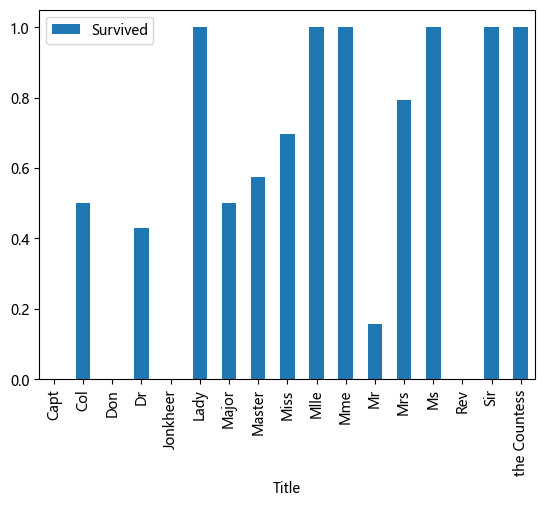

In [30]:
# 不同称呼的生存率
data_train[['Title', 'Survived']].groupby('Title').mean().plot(kind='bar')

从图中可以看出，不同称呼的乘客存活情况也不尽相同，存在显著差异，其中称呼为Lady、Mlle、Mme、Ms、Sir以及the countess的人群的存活率最高，均达到了100%的存活率；

### 1.3.10 票价分布与Survived的关系

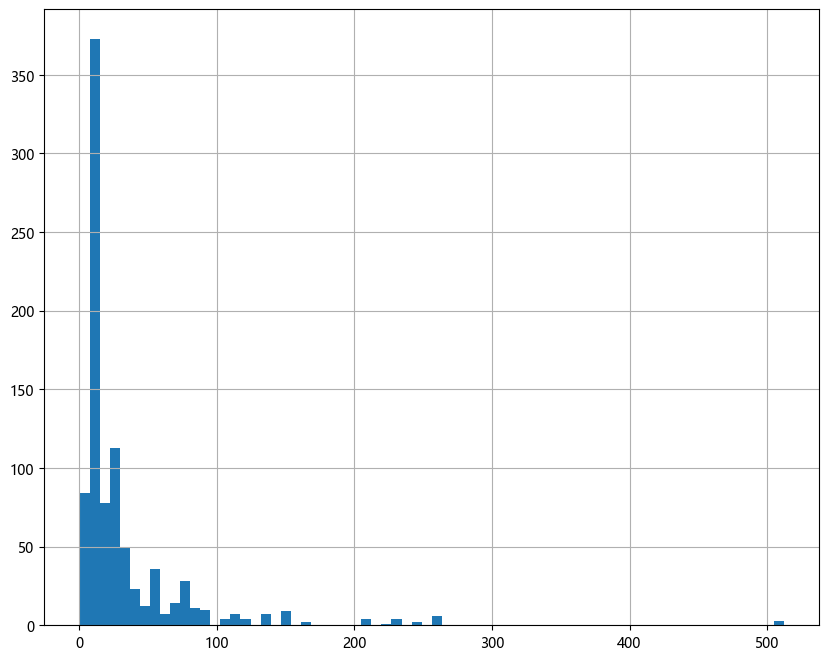

In [31]:
# 任务：绘制票价分布情况的直方图
# 设置绘图的大小
plt.figure(figsize=(10, 8))

# 绘制票价分布情况的直方图
data_train['Fare'].hist(bins=70)

# 显示图形
plt.show()

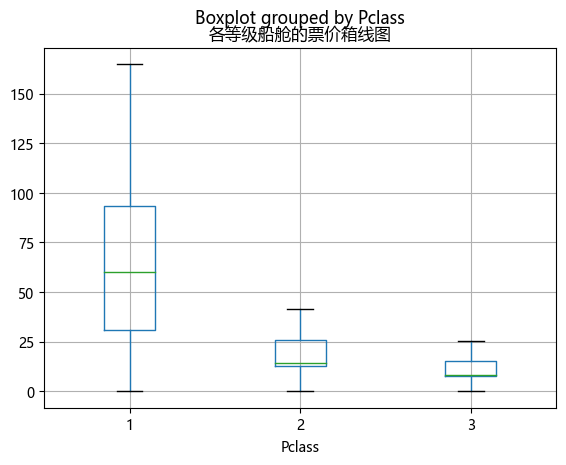

In [32]:
# 任务：绘制各等级船舱的票价箱线图

# 绘制各等级船舱的票价箱线图
data_train.boxplot(column='Fare', by='Pclass', showfliers=False)

# 设置图形标题
plt.title('各等级船舱的票价箱线图')

# 显示图形
plt.show()

In [33]:
data_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

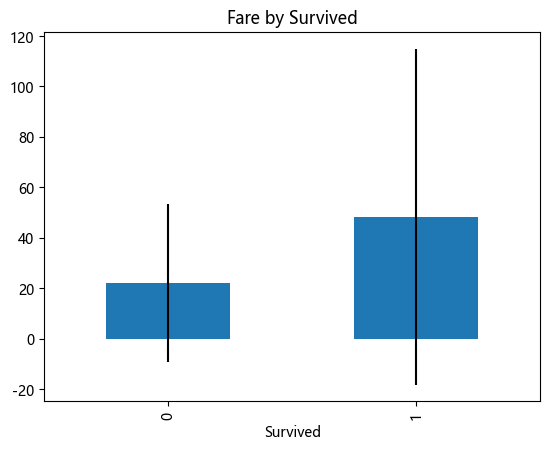

In [34]:
# 任务：绘制生还者与非生还者的票价均值和方差的关系

# 导入绘图相关的库
import pandas as pd
import matplotlib.pyplot as plt

# 选出生还者和非生还者的票价数据
fare_not_survived = data_train['Fare'][data_train['Survived'] == 0]
fare_survived = data_train['Fare'][data_train['Survived'] == 1]

# 计算票价均值和方差
average_fare = pd.DataFrame([fare_not_survived.mean(),fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(),fare_survived.std()])

# 绘制票价均值和方差的条形图
average_fare.plot(yerr=std_fare,kind='bar',legend=False)

# 设置图形标题和横轴标签
plt.title('Fare by Survived')
plt.xlabel('Survived')

# 显示图形
plt.show()

从图中可以看出，生存者的平均票价要大于未生还者的平均票价

## 1.4 小结
根据以上探索性分析，我们可以猜测出一些结论：

- 舱位等级：舱位越高的获救的概率最大，并且随着等级的递减，比如一等舱就比二三等舱获救概率大；
- 性别：女性的获救率远远高于男性；
- 登船港口：C港口最高，Q次之，S港口最低；（需结合具体背景解释原因）
- 携带家人数量：独自一人和亲友太多，存活率都比较低；
- 客舱：缺失值较多，很难分析出有用信息，这里简单将缺失的看成一类，未缺失的看成一类；
- 年龄：0到12岁儿童存活率最高，在50%左右，其次是少年，最低的是65岁到100岁的老年群体；
- 称呼：不同称呼的乘客存活情况也不尽相同，存在显著差异；其中，Lady、Mlle、Mme、Ms、Sir以及the countess存活率均在100%；
- 票价：生存者的平均票价要大于未生还者的平均票价；

# 2.特征工程
## 2.1 合并训练集与测试集
在进行特征工程的时候，我们不仅需要对训练数据进行处理，还需要同时将测试数据同训练数据一起处理，使得二者具有相同的数据类型和数据分布。

In [35]:
import pandas as pd

train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')
train_and_test = train.append(test, sort=False) # 合并训练集与测试集
PassengerId = test['PassengerId']
train_and_test.shape

(1309, 12)

## 2.2 缺失值处理
- 对Embarked直接用众数填充；
- 对Fare用均值填充；
- 对Age，建立模型预测；

### 2.2.1 填充Embarked字段

In [36]:
# 任务：使用众数填充数据集train_and_test中的Embarked列的缺失值，并检查是否还存在缺失值

# 找到Embarked列的众数
mode = train_and_test['Embarked'].mode().iloc[0]

# 使用众数填充Embarked列的缺失值
train_and_test['Embarked'].fillna(mode, inplace=True)

# 检查数据集中是否还存在缺失值
train_and_test.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
dtype: int64

### 2.2.2 填充船票Fare字段

In [37]:
train_and_test['Fare'].mean()

33.29547928134557

In [38]:
Fare_mean = train_and_test['Fare'].mean()
train_and_test['Fare'].fillna(Fare_mean, inplace=True)
train_and_test.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

### 2.2.3 填充年龄Age字段
为尽可能用多的特征去预测Age的值，先对Cabin、Embarked、Name、Sex、Ticket、Pclass等特征进行处理，模型预测见后；

## 2.3 不同特征字段的数据处理
### 2.3.1 先对Embarked、Sex以及Pclass等用dummy处理

In [39]:
# 任务：对数据集train_and_test中的分类特征进行编码，并检查是否还存在缺失值

# 导入pandas库
import pandas as pd

# 指定需要进行编码的列
cols = ['Embarked', 'Sex', 'Pclass']

# 对这些列进行独热编码
train_and_test = pd.get_dummies(train_and_test, columns=cols, prefix_sep='__')

# 检查数据集中是否还存在缺失值
train_and_test.isnull().sum()

PassengerId       0
Survived        418
Name              0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked__C       0
Embarked__Q       0
Embarked__S       0
Sex__female       0
Sex__male         0
Pclass__1         0
Pclass__2         0
Pclass__3         0
dtype: int64

### 2.3.2 票价分级处理
我们可以尝试将Fare分桶处理,使用qcut函数。qcut是根据这些值的频率来选择箱子的均匀间隔，每个箱子中含有的数的数量是相同的;

In [40]:
# 任务：将数据集train_and_test中的票价列按照分位数进行分组，并对分组后的数据进行编码

# 将票价列按照分位数进行分组，并生成一个新的列
train_and_test['Fare_bin'] = pd.qcut(train_and_test['Fare'], 5)

# 对新生成的列进行编码
train_and_test['Fare_bin_id'] = pd.factorize(train_and_test['Fare_bin'])[0]
fare_bin_dummies_df = pd.get_dummies(train_and_test['Fare_bin_id']).rename(columns=lambda x : 'Fare_' + str(x))

# 将编码后的数据与原数据集进行合并
train_and_test = pd.concat([train_and_test, fare_bin_dummies_df], axis=1)

# 删除临时生成的列
train_and_test.drop(['Fare_bin'], axis=1, inplace=True)

### 2.3.3 名字处理
对名字Name进行处理，提取其特征；

In [41]:
# 任务：提取数据集train_and_test中每个乘客的称呼

# 提取每个乘客的称呼
train_and_test['Title'] = train_and_test['Name'].apply(lambda x : x.split(',')[1].split('.')[0].strip())

# 输出每个乘客的称呼
train_and_test['Title']

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 1309, dtype: object

In [42]:
# 任务：将数据集train_and_test中的各式称呼进行统一化处理

# 定义称呼映射表
titleDict = {
    "Capt" :      "Officer", 
    "Col"  :      "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}

# 使用映射表将各式称呼进行统一化处理
train_and_test['Title'] = train_and_test['Title'].map(titleDict)

# 输出每种称呼的数量
train_and_test['Title'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64

In [43]:
# 任务：对数据集train_and_test中的称呼列进行one-hot编码

# 为称呼列进行编码
train_and_test['Title'] = pd.factorize(train_and_test['Title'])[0]

# 对编码后的数据进行one-hot编码
title_dummies_df = pd.get_dummies(train_and_test['Title'], prefix=train_and_test[['Title']].columns[0])

# 将one-hot编码后的数据与原数据集进行合并
train_and_test = pd.concat([train_and_test, title_dummies_df], axis=1)

# 检查数据集中每列的数据类型和非空值数量
train_and_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Name         1309 non-null   object 
 3   Age          1046 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Ticket       1309 non-null   object 
 7   Fare         1309 non-null   float64
 8   Cabin        295 non-null    object 
 9   Embarked__C  1309 non-null   uint8  
 10  Embarked__Q  1309 non-null   uint8  
 11  Embarked__S  1309 non-null   uint8  
 12  Sex__female  1309 non-null   uint8  
 13  Sex__male    1309 non-null   uint8  
 14  Pclass__1    1309 non-null   uint8  
 15  Pclass__2    1309 non-null   uint8  
 16  Pclass__3    1309 non-null   uint8  
 17  Fare_bin_id  1309 non-null   int64  
 18  Fare_0       1309 non-null   uint8  
 19  Fare_1 

In [44]:
# 任务：提取长度特征
# 将train_and_test数据集中Name列的每个元素转化为其长度，存储到Name_length列中
train_and_test['Name_length'] = train_and_test['Name'].apply(len)
# 输出Name_length列的数据
train_and_test['Name_length']

0      23
1      51
2      22
3      44
4      24
       ..
413    18
414    28
415    28
416    19
417    24
Name: Name_length, Length: 1309, dtype: int64

### 2.3.4 Cabin处理
Cabin缺失值过多，将其分为有无两类，进行编码，如果缺失，即为0，否则为1;

In [45]:
# 任务：处理Cabin特征
# 将train_and_test数据集中Cabin列中缺失值替换为'U0'
train_and_test.loc[train_and_test.Cabin.isnull(), 'Cabin'] = 'U0'
# 将train_and_test数据集中Cabin列中的非缺失值替换为1，缺失值替换为0
train_and_test['Cabin'] = train_and_test['Cabin'].apply(lambda x : 0 if x == 'U0' else 1)
# 输出Cabin列的数据
train_and_test['Cabin']

0      0
1      1
2      0
3      1
4      0
      ..
413    0
414    1
415    0
416    0
417    0
Name: Cabin, Length: 1309, dtype: int64

### 2.3.5 Ticket处理
Ticket有字母和数字之分，对于不同的字母，可能在很大程度上就意味着船舱等级或者不同船舱的位置，也会对Survived产生一定的影响，所以我们将Ticket中的字母分开，为数字的部分则分为一类。

In [46]:
# 任务：处理Ticket特征
# 将train_and_test数据集中Ticket列中的每个元素按空格拆分，取第一个元素存储到Ticket_Letter列中
train_and_test['Ticket_Letter'] = train_and_test['Ticket'].str.split().str[0]
# 如果Ticket_Letter列的值为数字，则将其替换为'U0'
train_and_test['Ticket_Letter'] = train_and_test['Ticket_Letter'].apply(lambda x : 'U0' if x.isnumeric() else x)
# 将Ticket_Letter列进行factorize编码
train_and_test['Ticket_Letter'] = pd.factorize(train_and_test['Ticket_Letter'])[0]
# 输出Ticket_Letter列的数据
train_and_test['Ticket_Letter']

0       0
1       1
2       2
3       3
4       3
       ..
413    24
414     1
415    21
416     3
417     3
Name: Ticket_Letter, Length: 1309, dtype: int64

## 2.4 利用随机森林预测Age缺失值

In [47]:
# 任务：使用随机森林回归模型填充Age特征缺失值
# 导入随机森林回归模型
from sklearn.ensemble import RandomForestRegressor

# 去除数据集中字符串类型的字段，获取仅包含数值类型的数据集
missing_age = train_and_test.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
# 获取Age列非空值所在的行，作为训练集
missing_age_train = missing_age[missing_age['Age'].notnull()]
# 获取Age列空值所在的行，作为测试集
missing_age_test = missing_age[missing_age['Age'].isnull()]

# 分别获取训练集和测试集中的特征和标签
X_train = missing_age_train.iloc[:,1:]
y_train = missing_age_train.iloc[:,0]
X_test = missing_age_test.iloc[:,1:]

# 创建随机森林回归模型并进行训练
rfr = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
rfr.fit(X_train, y_train)

# 预测并填充测试集中的缺失值
y_predict = rfr.predict(X_test)
train_and_test.loc[train_and_test['Age'].isnull(), 'Age'] = y_predict

# 输出填充后的数据集信息
train_and_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   int64  
 1   Survived       891 non-null    float64
 2   Name           1309 non-null   object 
 3   Age            1309 non-null   float64
 4   SibSp          1309 non-null   int64  
 5   Parch          1309 non-null   int64  
 6   Ticket         1309 non-null   object 
 7   Fare           1309 non-null   float64
 8   Cabin          1309 non-null   int64  
 9   Embarked__C    1309 non-null   uint8  
 10  Embarked__Q    1309 non-null   uint8  
 11  Embarked__S    1309 non-null   uint8  
 12  Sex__female    1309 non-null   uint8  
 13  Sex__male      1309 non-null   uint8  
 14  Pclass__1      1309 non-null   uint8  
 15  Pclass__2      1309 non-null   uint8  
 16  Pclass__3      1309 non-null   uint8  
 17  Fare_bin_id    1309 non-null   int64  
 18  Fare_0   

## 2.5 各特征与Survived的相关系数排序

In [48]:
# 任务：筛选出重要特征
# 计算train_and_test数据集中各特征与Survived特征的相关系数并按照系数的绝对值从大到小排序
train_and_test.corr()['Survived'].abs().sort_values(ascending=False)

Survived         1.000000
Title_0          0.549199
Sex__male        0.543351
Sex__female      0.543351
Title            0.377155
Title_1          0.344935
Title_2          0.332795
Name_length      0.332350
Pclass__3        0.322308
Cabin            0.316912
Pclass__1        0.285904
Fare_1           0.263007
Fare             0.257307
Fare_2           0.191707
Fare_0           0.171109
Embarked__C      0.168240
Embarked__S      0.149683
Pclass__2        0.093349
Title_3          0.085221
Ticket_Letter    0.082068
Parch            0.081629
Age              0.080518
Fare_bin_id      0.071787
Fare_4           0.064843
Fare_3           0.040812
SibSp            0.035322
Title_4          0.033391
Title_5          0.031316
PassengerId      0.005007
Embarked__Q      0.003650
Name: Survived, dtype: float64

## 2.6 保存特征处理后的数据

In [49]:
train_and_test.to_csv('./datasets/经过特征工程处理后的数据.csv', index=None)

## 2.7 小结
特征工程这一章主要做了以下工作：
- 合并训练集和测试集
    - 为了使二者具有相同的数据类型和数据分布；
- 缺失值处理：
    - Embarked:众数填充；
    - Fare:平均值填充；
    - Age:随机森林预测填充；
- 各特征字段的数据处理：
    - Embarked,Sex,Pclass: 直接dummy编码；
    - Fare: 先分桶处理，再dummy编码；
    - Name: 先提取称呼，再对称呼进行人群分类，最后dummy处理；
    - cabin：缺失值较多，根据是否缺失划分类别，缺失为0，否则为1；
    - Ticket:只保留其中字母，并对字母进行数字转换；
- 随机森林建模预测Age缺失值；
- 对各特征与生存与否进行了相关系数大小排序；

# 3. 建模及模型评价
## 3.1 数据分离
将经过特征工程处理后的数据分开，分成最初的训练数据和测试数据；
### 3.1.1 读取数据

In [50]:
# 任务：读取数据文件
# 导入pandas库，并读取train.csv、test.csv、gender_submission.csv和经过特征工程处理后的数据.csv文件
import pandas as pd
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')
truth = pd.read_csv('./datasets/gender_submission.csv')
train_and_test = pd.read_csv('./datasets/经过特征工程处理后的数据.csv')

# 将test数据集中的PassengerId列提取出来，并存储到PassengerId变量中
PassengerId = test['PassengerId']

### 3.1.2 划分训练集和测试集

In [51]:
# 任务：划分训练集和测试集
# 获取test数据集中的第一个乘客的索引
index = PassengerId[0] - 1

# 去除train_and_test数据集中的PassengerId、Name和Ticket列，获取仅包含特征和标签的数据集
train_and_test_drop = train_and_test.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
# 将train_and_test数据集划分为训练集和测试集
train_data = train_and_test_drop[:index]
test_data = train_and_test_drop[index:]

# 分别获取训练集和测试集中的特征和标签
train_X = train_data.drop(['Survived'], axis=1)
train_y = train_data['Survived']
test_X = test_data.drop(['Survived'], axis=1)
test_y = truth['Survived']

# 输出训练集和测试集的形状
train_X.shape, train_y.shape, test_X.shape

((891, 28), (891,), (418, 28))

## 3.2 建模及模型评价

### 3.2.1 逻辑回归

In [52]:
# 任务：使用逻辑回归模型进行预测
# 导入LogisticRegression模型
from sklearn.linear_model import LogisticRegression
# 导入roc_auc_score评价指标
from sklearn.metrics import roc_auc_score

# 创建LogisticRegression模型并进行训练
lr = LogisticRegression()
lr.fit(train_X, train_y)

# 使用训练好的模型进行预测，并计算预测准确率
pred_lr = lr.predict(test_X)
accuracy_lr = roc_auc_score(test_y, pred_lr)
print("逻辑回归的预测结果：", accuracy_lr)

逻辑回归的预测结果： 0.9140037593984963


### 3.2.2 随机森林-RF

In [53]:
# 任务：使用随机森林模型进行预测
# 导入RandomForestClassifier模型
from sklearn.ensemble import RandomForestClassifier

# 创建RandomForestClassifier模型并进行训练
rfc = RandomForestClassifier()
rfc.fit(train_X, train_y)

# 使用训练好的模型进行预测，并计算预测准确率
pred_rfc = rfc.predict(test_X)
accuracy_rfc = roc_auc_score(test_y, pred_rfc)
print("随机森林的预测结果：", accuracy_rfc)

随机森林的预测结果： 0.843984962406015


### 3.2.3 支持向量机-SVM

In [54]:
# 任务：使用支持向量机模型进行预测
# 导入SVC模型
from sklearn.svm import SVC

# 创建SVC模型并进行训练
svm = SVC()
svm.fit(train_X,train_y)

# 使用训练好的模型进行预测，并计算预测准确率
pred_svm = svm.predict(test_X)
accuracy_svm = roc_auc_score(test_y, pred_svm)
print("支持向量机的预测结果：", accuracy_svm)

支持向量机的预测结果： 0.6484962406015038


### 3.2.4 K最近邻-KNN

In [55]:
# 任务：使用K最近邻分类器进行预测
# 导入KNeighborsClassifier模型
from sklearn.neighbors import KNeighborsClassifier

# 创建KNeighborsClassifier模型并进行训练
knn = KNeighborsClassifier()
knn.fit(train_X,train_y)

# 使用训练好的模型进行预测，并计算预测准确率
pred_knn = knn.predict(test_X)
accuracy_knn = roc_auc_score(test_y, pred_knn)
print("K最近邻分类器的预测结果：", accuracy_knn)

K最近邻分类器的预测结果： 0.6884398496240602


### 3.2.5 决策树

In [56]:
# 任务：使用决策树模型进行预测
# 导入DecisionTreeClassifier模型
from sklearn.tree import DecisionTreeClassifier

# 创建DecisionTreeClassifier模型并进行训练
dtree = DecisionTreeClassifier()
dtree.fit(train_X,train_y)

# 使用训练好的模型进行预测，并计算预测准确率
pred_dtree = dtree.predict(test_X)
accuracy_dtree = roc_auc_score(test_y, pred_dtree)
print("决策树模型的预测结果：", accuracy_dtree)

决策树模型的预测结果： 0.8143796992481203


### 3.2.6 梯度提升决策树-GBDT

In [57]:
# 任务：使用GBDT模型进行预测
# 导入GradientBoostingClassifier模型
from sklearn.ensemble import GradientBoostingClassifier

# 创建GradientBoostingClassifier模型并进行训练
gbdt = GradientBoostingClassifier()
gbdt.fit(train_X, train_y)

# 使用训练好的模型进行预测，并计算预测准确率
pred_gbdt = gbdt.predict(test_X)
accuracy_gbdt = roc_auc_score(test_y, pred_gbdt)
print("GBDT模型的预测结果：", accuracy_gbdt)

GBDT模型的预测结果： 0.850093984962406


### 3.2.7 LightGBM算法

In [58]:
# 任务：使用LightGBM模型进行预测
# 导入LightGBM模型
import lightgbm as lgb

# 创建LightGBM训练集和测试集
lgb_train = lgb.Dataset(train_X, train_y)
lgb_eval = lgb.Dataset(test_X, test_y, reference = lgb_train)

# 创建LightGBM模型并进行训练
gbm = lgb.train(params = {}, train_set = lgb_train, valid_sets = lgb_eval)

# 使用训练好的模型进行预测，并计算预测准确率
pred_lgb = gbm.predict(test_X, num_iteration = gbm.best_iteration)
accuracy_lgb = roc_auc_score(test_y, pred_lgb) 
print("LightGBM模型的预测结果：", accuracy_lgb)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000544 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 384
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 26
[LightGBM] [Info] Start training from score 0.383838
[1]	valid_0's l2: 0.206646
[2]	valid_0's l2: 0.185886
[3]	valid_0's l2: 0.169265
[4]	valid_0's l2: 0.155595
[5]	valid_0's l2: 0.144824
[6]	valid_0's l2: 0.135448
[7]	valid_0's l2: 0.128143
[8]	valid_0's l2: 0.122101
[9]	valid_0's l2: 0.117703
[10]	valid_0's l2: 0.112993
[11]	valid_0's l2: 0.109994
[12]	valid_0's l2: 0.1071
[13]	valid_0's l2: 0.105071
[14]	valid_0's l2: 0.103037
[15]	valid_0's l2: 0.101951
[16]	valid_0's l2: 0.100891
[17]	valid_0's l2: 0.100526
[18]	valid_0's l2: 0.0995172
[19]	valid_0's l2: 0.0985701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[20]	valid_0's l2: 0.0988206
[21]	valid_0's l2: 0.0990039
[2

### 3.2.8 XGBoost算法

In [59]:
# 任务：使用XGBoost模型进行预测
# 导入XGBClassifier模型
from xgboost import XGBClassifier

# 创建XGBClassifier模型并进行训练
xgbc = XGBClassifier()
xgbc.fit(train_X, train_y)

# 使用训练好的模型进行预测，并计算预测准确率
pred_xgbc = xgbc.predict(test_X)
accuracy_xgbc = roc_auc_score(test_y, pred_xgbc) 
print("XGBoost模型的预测结果：", accuracy_xgbc)

XGBoost模型的预测结果： 0.819078947368421


### 3.2.9 极端随机树

In [61]:
# 任务：使用极端随机树模型对数据进行训练，并输出预测结果的准确性

from sklearn.ensemble import ExtraTreesClassifier

# 使用极端随机树模型对训练集train_X和训练标签train_y进行训练
etree = ExtraTreesClassifier()
etree.fit(train_X, train_y)

# 使用训练好的模型对测试集test_X进行预测，并计算预测准确性
pred_etree = etree.predict(test_X)
accuracy_etree = roc_auc_score(test_y, pred_etree)

# 输出预测准确性结果
print("极端随机树模型的预测结果：", accuracy_etree)

极端随机树模型的预测结果： 0.8359962406015037


### 3.2.10 AdaBoost算法

In [63]:
# 任务：使用AdaBoost模型对数据进行训练，并输出预测结果的准确性
# 使用AdaBoost模型对训练集train_X和训练标签train_y进行训练

from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(train_X, train_y)

# 使用训练好的模型对测试集test_X进行预测，并计算预测准确性
pred_abc = abc.predict(test_X)
accuracy_abc = roc_auc_score(test_y, pred_abc) 

# 输出预测准确性结果
print("AdaBoost模型的预测结果：", accuracy_abc)

AdaBoost模型的预测结果： 0.8703007518796991


### 3.2.11 基于Bagging的K最近邻

In [64]:
# 任务：使用基于Bagging的K紧邻模型对数据进行训练，并输出预测结果的准确性
# 使用K紧邻模型作为基分类器，通过Bagging方式对训练集train_X和训练标签train_y进行训练

from sklearn.ensemble import BaggingClassifier

bag_knn = BaggingClassifier(KNeighborsClassifier())
bag_knn.fit(train_X, train_y)

# 使用训练好的模型对测试集test_X进行预测，并计算预测准确性
pred_bag_knn = bag_knn.predict(test_X)
accuracy_bag_knn = roc_auc_score(test_y, pred_bag_knn)

# 输出预测准确性结果
print("基于Bagging的K紧邻模型的预测结果：", accuracy_bag_knn)

基于Bagging的K紧邻模型的预测结果： 0.7161654135338346


### 3.2.12 基于Bagging的决策树

In [65]:
# 任务：使用基于Bagging的决策树模型对数据进行训练，并输出预测结果的准确性
# 使用决策树模型作为基分类器，通过Bagging方式对训练集train_X和训练标签train_y进行训练

from sklearn.ensemble import BaggingClassifier

bag_dt = BaggingClassifier(DecisionTreeClassifier())
bag_dt.fit(train_X, train_y)

# 使用训练好的模型对测试集test_X进行预测，并计算预测准确性
pred_bag_dt = bag_dt.predict(test_X)
accuracy_bag_dt = roc_auc_score(test_y, pred_bag_dt)

# 输出预测准确性结果
print("基于Bagging的决策树模型的预测结果：", accuracy_bag_dt)

基于Bagging的决策树模型的预测结果： 0.8336466165413533


# 3.3 小结

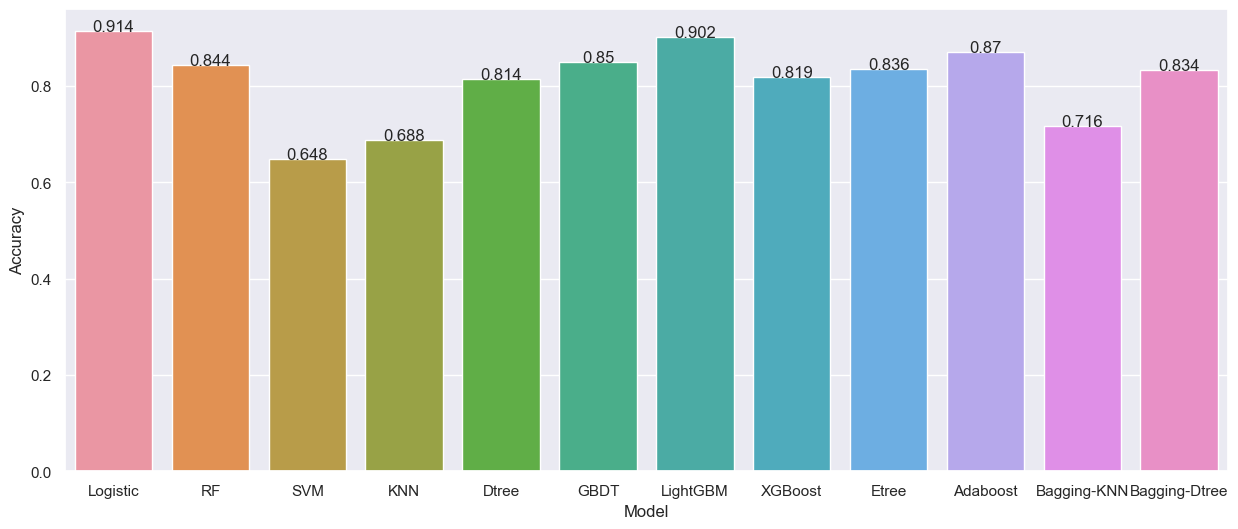

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(15,6)}) # 设置画布大小
accuracys = [accuracy_lr, accuracy_rfc, accuracy_svm, accuracy_knn, accuracy_dtree, accuracy_gbdt, accuracy_lgb,accuracy_xgbc, accuracy_etree, accuracy_abc, accuracy_bag_knn, accuracy_bag_dt, ]
models = ['Logistic', 'RF', 'SVM', 'KNN', 'Dtree', 'GBDT', 'LightGBM', 'XGBoost', 'Etree', 'Adaboost', 'Bagging-KNN', 'Bagging-Dtree']
bar = sns.barplot(x=models, y=accuracys)

# 显示数值标签
for x, y in enumerate(accuracys):
    plt.text(x, y, '%s'% round(y,3), ha='center')

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

根据上述条形图可以看出，在全部模型默认参数的情况下，逻辑回归的预测准确率最高，达到了0.911，其次是LightGBM模型，也在0.9以上，达到80%准确率以上的模型有RF、GBDT、XGBoost、ETree、Adaboost以及基于Bagging的决策树，其他模型的预测准确率则较低；